## Robust Regression using scikit-learn

## Motivation
Simple OLS(ordinary least square regression) is susceptible to the outliers and it can be disastrous if data is contaminated with outliers. OLS can be only used if all the assumptions of data are valid; when some of the assumptions turn out to be invalid, it can perform poorly. ***Robust Regression ***provides an alternative to least square regression by lowering the restrictions on assumptions. Robust algorithms dampens the effect of outliers in order to fit majority of the data. 


Outliers tend to pull regression fit too far in the direction recieving much more *weight *than they deserve in case of least squares. Robust regression down-weights the influence of outliers, which makes their residuals larger & easier to identify.

## Overview of Robust regression models in scikit-learn: 

There are several robust regression methods available. scikit-learn provides following methods out-of-the-box.


### 1.   Hubber Regression
[HuberRegressor model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor)

Huber loss is a loss function used in robust regression that is less sensitive to outliers in data than the squared error loss.
The Hubber Regressor provided by scikit-learn  optimizes the squared loss and absolute loss for the samples based on epsilon, where epsilon is a parameter to control the number of samples which should be treated as outliers.



### 2.RANSAC Regression

[RANSAC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor) (RANdom SAmple Consensus) algorithm.

RANSAC algorithm divides data in two subsets : outlier and inlier, then it uses inlier set to fit model. After fitting model to hypothetical inliers, it checks which elements in current set are consistent with original dataset with estimated parameters and if it is the case, it updates current subset. RANSAC algorithm continues iterating until inlier subset is large enough.


### 3. Theil-Sen Regression
[Theil-Sen Estimator](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor): robust multivariate regression model.

According to scikit-learn, *the algorithm calculates least square solutions on subsets with size n_subsamples of the samples in X. Any value of n_subsamples between the number of features and samples leads to an estimator with a compromise between robustness and efficiency.*

##Implementation

Now, let's implement these three regression models using scikit-learn and compare them with Linear Regression. This implementation is largely derived from sklearn's documentation.

###Importing  modules





In [0]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (LinearRegression, 
                                  TheilSenRegressor, 
                                  RANSACRegressor, 
                                  HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Generating  sinusoidal data

Sinosoidal data would be perfect to check outliers. We can make train and test data separately. Test data can be used to check mse(mean squared error) after fitting

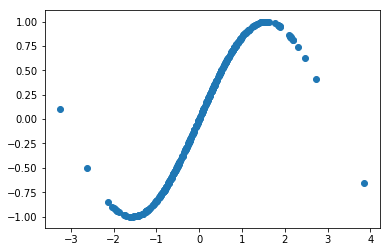

In [38]:
np.random.seed(42)

#Train data
X = np.random.normal(size=400)
y = np.sin(X)
X = X[:, np.newaxis]


# Test Data
X_test = np.random.normal(size=200)
y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

plt.scatter(X,y)


### Generating errors on X and Y
To check  *robustness* of model, we will put outliers on different axes and positions of X and Y. Then we will see how each model responds to various outliers. We will create 4 sets of outlier ridden data :

1.  Small outliers on Y
2.  Small outliers on X
3.  Large outliers on Y
4.  Large outliers on X



Text(0.5, 1.0, 'Large X outliers')

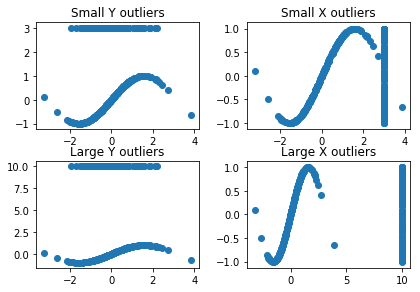

In [35]:
# Small outliers on Y
y_errors = y.copy()
y_errors[::3] = 3

#Small outliers on X
X_errors = X.copy()
X_errors[::3] = 3

#Small outliers on Y
y_errors_large = y.copy()
y_errors_large[::3] = 10

#Large outliers on X
X_errors_large = X.copy()
X_errors_large[::3] = 10

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
ax[0, 0].scatter(X,y_errors)
ax[0, 0].set_title("Small Y outliers")

ax[0, 1].scatter(X_errors,y)
ax[0, 1].set_title("Small X outliers")

ax[1, 0].scatter(X,y_errors_large)
ax[1, 0].set_title("Large Y outliers")

ax[1, 1].scatter(X_errors_large,y)
ax[1, 1].set_title("Large X outliers")



### Defining models

Now that we have our data ready, we can build models for robust regression. 

Instead of running models individually, they can be iterated using for loop and scikit-learn [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). For iterating, we will first build a dictionary containing instants of model, colors for plotting them and their linestyles. Hence, using this, we can plot fitting line of all models on a single plot.

In [0]:
estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=42)),
              ('RANSAC', RANSACRegressor(random_state=42)),
              ('HuberRegressor', HuberRegressor())]
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold', 'RANSAC': 'lightgreen', 'HuberRegressor': 'black'}
linestyle = {'OLS': '-', 'Theil-Sen': '-.', 'RANSAC': '--', 'HuberRegressor': '--'}
lw = 3
x_plot = np.linspace(X.min(), X.max())


In a following loop, 

1.   Model is built using sklearn pipeline : `make_pipeline(PolynomialFeatures(3), estimator)`. We have used `PolynomialFeatures ` because our data is sinosoidal and cannot be fitted using a line. After polynomials are generated, they are passed to estimator defined in a dictionary.
2.   Model is fitted using `fit(this_X, this_y)` , where ` this_X ` and ` this_y` are error data passed through for loop.
3.   Model performance is calculated using `mean_squared_error(model.predict(X_test), y_test)`.
4.  Predicted `Y` is then simple calculated using `model.predict(x_plot[:, np.newaxis])`.


After building, fitting and predicting, the data is plotted for each of the model and for each of the four error types.

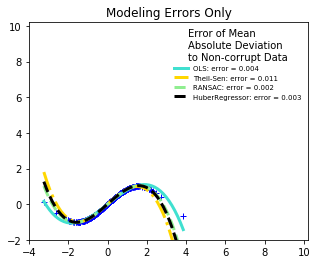

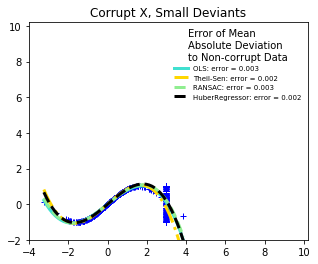

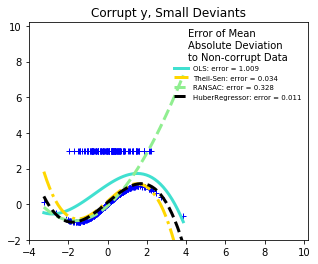

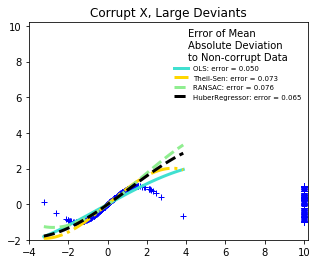

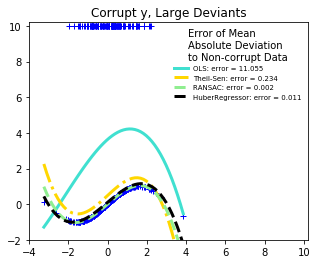

In [37]:
for title, this_X, this_y in [
        ('Modeling Errors Only', X, y),
        ('Corrupt X, Small Deviants', X_errors, y),
        ('Corrupt y, Small Deviants', X, y_errors),
        ('Corrupt X, Large Deviants', X_errors_large, y),
        ('Corrupt y, Large Deviants', X, y_errors_large)]:
    plt.figure(figsize=(5, 4))
    plt.plot(this_X[:, 0], this_y, 'b+')

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(x_plot, y_plot, color=colors[name], linestyle=linestyle[name],
                 linewidth=lw, label='%s: error = %.3f' % (name, mse))

    legend_title = 'Error of Mean\nAbsolute Deviation\nto Non-corrupt Data'
    legend = plt.legend(loc='upper right', frameon=False, title=legend_title,
                        prop=dict(size='x-small'))
    plt.xlim(-4, 10.2)
    plt.ylim(-2, 10.2)
    plt.title(title)
plt.show()

## What can we infer:


*   RANSAC is good for large outliers in the y direction.
*   TheilSen is good for small outliers, both in direction X and y, but has a break point above which it performs worse than OLS.
*  The scores of HuberRegressor may not be compared directly to both TheilSen and RANSAC because it does not attempt to completely filter the outliers but lessen their effect.

Despite superior performance over least square models, robust models are still not widely used. Reasons being: Robust regression requires heavy computations and *sometimes*  outliers are requirement of a model.



## Interesting reads:

*   [https://newonlinecourses.science.psu.edu/stat501/node/353/](https://newonlinecourses.science.psu.edu/stat501/node/353/)
*   [https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html](https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html)
* [https://en.wikipedia.org/wiki/Robust_regression](https://en.wikipedia.org/wiki/Robust_regression)


## Source

Download Jupyter notebook from [GitHub](https://github.com/ostwalprasad/ostwalprasad.github.io/blob/master/jupyterbooks/2019-01-27-.ipynb)